In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

In [2]:
import pathlib

In [3]:
data_dir=pathlib.Path('D:\Data science files\Downloaded\Landscape data\Landscape Classification\Landscape Classification')

In [4]:
train=pathlib.Path('D:\Data science files\Downloaded\Landscape data\Landscape Classification\Landscape Classification\Training Data')

In [5]:
valid=pathlib.Path('D:\Data science files\Downloaded\Landscape data\Landscape Classification\Landscape Classification\Validation Data')

In [6]:
Batch_size=500
img_height=180
img_length=180

In [7]:
train_ds=tf.keras.utils.image_dataset_from_directory(train,
                                                      validation_split=0.2,
                                                      batch_size=Batch_size,
                                                      seed=123,
                                                      subset='training',
                                                      image_size=(img_height,img_length))

Found 10000 files belonging to 5 classes.
Using 8000 files for training.


In [8]:
val_ds=tf.keras.utils.image_dataset_from_directory(valid,
                                                  validation_split=0.2,
                                                  seed=123,
                                                  batch_size=Batch_size,
                                                  image_size=(img_height,img_length),
                                                  subset='validation')

Found 1500 files belonging to 5 classes.
Using 300 files for validation.


In [9]:
class_names=train_ds.class_names
print(class_names)

['Coast', 'Desert', 'Forest', 'Glacier', 'Mountain']


In [10]:
class_names2=val_ds.class_names
print(class_names2)

['Coast', 'Desert', 'Forest', 'Glacier', 'Mountain']


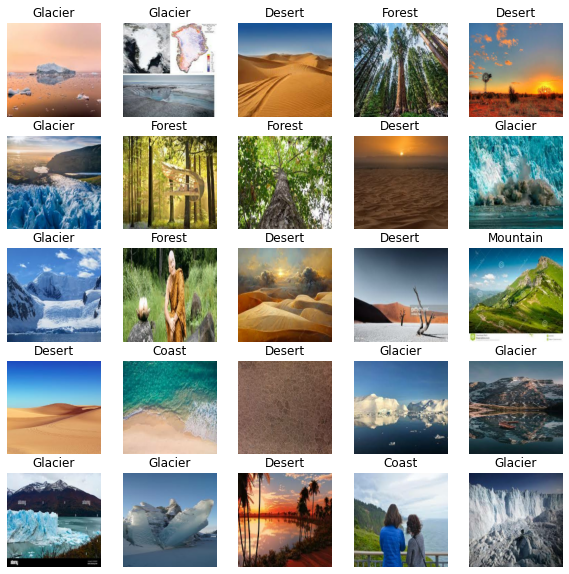

In [11]:
plt.figure(figsize=(10,10))
for images,lables in train_ds.take(1):
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[lables[i]])
        plt.axis("off")
        

In [12]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1/450, input_shape=(img_height, img_length, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(450, activation='sigmoid')
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


C:\Users\Admin\anaconda3\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


16/16 [==============================] - 879s 44s/step - loss: 2.3910 - accuracy: 0.3241 - val_loss: 1.1209 - val_accuracy: 0.5700
Epoch 2/10
16/16 [==============================] - 642s 28s/step - loss: 1.0244 - accuracy: 0.6008 - val_loss: 0.9485 - val_accuracy: 0.6433
Epoch 3/10
16/16 [==============================] - 623s 27s/step - loss: 0.9000 - accuracy: 0.6447 - val_loss: 0.8729 - val_accuracy: 0.6433
Epoch 4/10
16/16 [==============================] - 295s 14s/step - loss: 0.8554 - accuracy: 0.6744 - val_loss: 0.8571 - val_accuracy: 0.6667
Epoch 5/10
16/16 [==============================] - 208s 10s/step - loss: 0.8200 - accuracy: 0.6891 - val_loss: 0.8460 - val_accuracy: 0.6900
Epoch 6/10
16/16 [==============================] - 145s 9s/step - loss: 0.7839 - accuracy: 0.7009 - val_loss: 0.8378 - val_accuracy: 0.7000
Epoch 7/10
16/16 [==============================] - 147s 9s/step - loss: 0.7586 - accuracy: 0.7085 - val_loss: 0.8530 - val_accuracy: 0.6667
Epoch 8/10
16/16 [=

In [39]:
# Imports PIL module 
from PIL import Image
  
# open method used to open different extension image file
im = Image.open(r"D:\Data science files\Downloaded\Landscape data\Landscape Classification\Landscape Classification\Testing Data\Glacier\Glacier (304).jpeg") 
im = im.resize((180, 180))

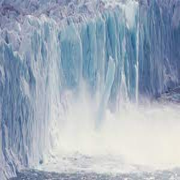

In [40]:
im

In [41]:
im=np.array(im)

In [42]:
im

array([[[108, 124, 158],
        [114, 130, 164],
        [134, 150, 184],
        ...,
        [124, 137, 179],
        [106, 123, 164],
        [112, 131, 171]],

       [[109, 124, 159],
        [127, 143, 177],
        [125, 140, 174],
        ...,
        [108, 122, 163],
        [ 90, 106, 147],
        [ 95, 114, 154]],

       [[126, 140, 175],
        [140, 155, 190],
        [116, 130, 164],
        ...,
        [ 98, 112, 154],
        [ 90, 105, 146],
        [ 95, 113, 153]],

       ...,

       [[163, 168, 189],
        [168, 173, 192],
        [171, 177, 192],
        ...,
        [207, 208, 212],
        [212, 213, 217],
        [212, 213, 217]],

       [[170, 175, 196],
        [170, 175, 195],
        [165, 171, 187],
        ...,
        [206, 207, 211],
        [209, 210, 214],
        [209, 210, 214]],

       [[165, 170, 191],
        [177, 182, 201],
        [172, 178, 194],
        ...,
        [190, 191, 195],
        [204, 205, 209],
        [203, 204, 208]]

In [43]:
im.shape

(180, 180, 3)

In [44]:
im = im.reshape(1,180,180,3)

In [46]:
pre=model.predict(im)

1/1 [==============================] - 0s 32ms/step


In [35]:
class_names = train_ds.class_names
print(class_names)

['Coast', 'Desert', 'Forest', 'Glacier', 'Mountain']


In [51]:
pred = np.argmax(pre, axis=-1)

In [55]:
print(class_names[pred[0]])

Glacier


In [56]:
im2=Image.open("D:\Data science files\Downloaded\Landscape data\Landscape Classification\Landscape Classification\Testing Data\Desert\Desert-Test (15).jpeg")

In [58]:
im2 = im2.resize((180, 180))

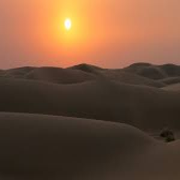

In [59]:
im2

In [60]:
im2=np.array(im2)

In [62]:
im2 = im2.reshape(1,180,180,3)

In [64]:
pre2=model.predict(im2)

1/1 [==============================] - 0s 31ms/step


In [66]:
pred2 = np.argmax(pre2, axis=-1)

In [67]:
print(class_names[pred[0]])

Desert
